In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.11.0'

In [ ]:
(X_train,y_train),(_,_)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
28*28

784

In [ ]:
y_train.shape

(60000,)

5


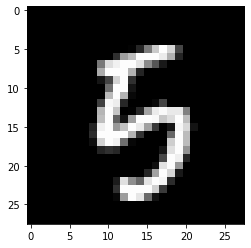

In [ ]:
i = np.random.randint(0,6000)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray');

In [ ]:
X_train= X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train[0].min(),X_train[0].max()

(0.0, 255.0)

In [ ]:
#this will reduce the value to a range between -1 and 1, as per many articles this gives the best result for GAN
X_train = (X_train - 127.5 )/127.5

In [ ]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

In [ ]:
buffer_size = 60000
batch_size = 256

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [ ]:
type(X_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
X_train

<BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [ ]:
def build_generator():
  network = tf.keras.Sequential()
  network.add(layers.Dense(7*7*256,use_bias=False,input_shape=(100, )))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7,7,256)))

  #7*7*128
  network.add(layers.Conv2DTranspose(128, (5,5), padding = 'same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  #14*14*64 - here size doubled because we are using conv2DTranspose, otherwise it would have been 3 when using stride as 2
  network.add(layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding = 'same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  #28*28*1
  network.add(layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding = 'same', use_bias=False, activation='tanh'))

  network.summary()
  return network


In [ ]:
generator =  build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

In [ ]:
noise = tf.random.normal([1,100])

In [ ]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.26258796,  1.1466973 , -0.97383   , -0.3215894 ,  0.56152517,
        -1.2150265 ,  0.04359332, -0.39516065,  0.47172177,  1.1373044 ,
         0.47409123, -1.221919  , -1.4651512 , -0.38056457, -0.24647835,
         0.16177708,  1.2340415 ,  0.18161991, -0.22992718,  0.14098199,
         0.81739604,  1.2498783 ,  0.03542231, -1.7333943 ,  0.305374  ,
         0.9703102 ,  0.49892795,  0.14009696,  0.536853  ,  1.6085526 ,
         0.81162715,  0.42084464,  0.6554855 , -0.06796713, -1.089899  ,
        -1.408861  , -0.877694  ,  0.89127034, -1.4792633 , -0.1443691 ,
         1.8728946 , -0.8051124 , -1.4366472 ,  1.4397712 , -1.2773458 ,
        -0.31703258, -0.8402708 , -0.48986244,  0.8819567 ,  0.2832476 ,
         0.24422452, -0.8789221 , -0.02452578, -0.38613936,  0.77996343,
         0.7876095 , -0.09950638,  0.88836783, -1.5037422 ,  1.16685   ,
         1.229615  , -1.0539612 , -0.52311826, -0.02075549, -0.5121224 ,
 

In [ ]:
generated_image= generator(noise,training=False)

In [ ]:
generated_image

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float32, numpy=
array([[[[ 4.77056339e-04],
         [ 2.17669504e-03],
         [ 7.42784515e-03],
         [ 1.32226129e-03],
         [ 1.70280400e-03],
         [ 8.97308718e-03],
         [ 3.35759600e-03],
         [-3.69560323e-03],
         [-3.01045948e-03],
         [-2.48283311e-03],
         [ 1.82421058e-02],
         [ 2.04760907e-03],
         [-7.68369704e-04],
         [ 1.04556028e-02],
         [ 6.89464575e-03],
         [-3.34715471e-04],
         [ 2.13075033e-03],
         [ 5.06683858e-03],
         [ 1.98510103e-02],
         [ 1.90701801e-04],
         [-4.01465781e-03],
         [ 6.26223278e-04],
         [ 1.19549818e-02],
         [-7.51986518e-04],
         [-3.18495813e-03],
         [ 6.73562009e-03],
         [ 3.97398742e-03],
         [ 5.47957700e-03]],

        [[ 4.70281392e-03],
         [-6.16192957e-03],
         [-5.14022168e-03],
         [-1.00806076e-02],
         [-6.76858984e-03],
         [ 9.76285

In [ ]:
generated_image.shape

TensorShape([1, 28, 28, 1])

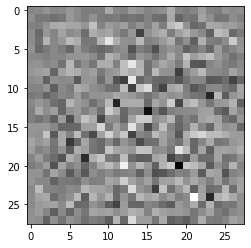

In [ ]:
plt.imshow(generated_image[0,:,:,0],cmap ='gray')

In [ ]:
def build_discriminator():
  network=tf.keras.Sequential()

  # 14*14*64
  network.add(layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7*7*128
  network.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()
  return network

In [ ]:
discriminator=build_discriminator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [ ]:
7*7*128

6272

In [ ]:
discriminator(generated_image,training=False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00108729]], dtype=float32)>

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def dicriminator_loss(expected_output, fake_output):
  real_loss=cross_entropy(tf.ones_like(expected_output),expected_output)
  fake_loss= cross_entropy(tf.zeros_like(fake_output),fake_output)
  total_loss=real_loss+fake_loss
  return total_loss

In [ ]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output),fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [ ]:
epochs=100
noise_dim=100
num_images_to_generate=16

In [ ]:
batch_size,noise_dim

(256, 100)

In [ ]:
@tf.function
def train_steps(images):
  noise=tf.random.normal([batch_size,noise_dim])
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
    generated_images = generator(noise,training=True)

    expected_output = discriminator(images,training=True)
    fake_output=discriminator(generated_images,training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = dicriminator_loss(expected_output,fake_output)

  gradient_of_generator = gen_tape.gradient(gen_loss,generator.trainable_variables)
  gradient_of_discriminator = disc_tape.gradient(disc_loss,discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradient_of_generator,generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradient_of_discriminator,discriminator.trainable_variables))

In [ ]:
test_images = tf.random.normal([num_images_to_generate,noise_dim])

In [ ]:
test_images.shape

TensorShape([16, 100])

In [ ]:
60000 / 256

234.375

In [ ]:
def train(dataset,epochs,test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      train_steps(image_batch)

    print('Epoch ',epoch+1)
    generated_images = generator(test_images,training=False)
    fig=plt.figure(figsize=(10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(generated_images[i,:,:,0] * 127.5+127.5,cmap='gray')
      plt.axis('off')
    plt.show()

Epoch  1


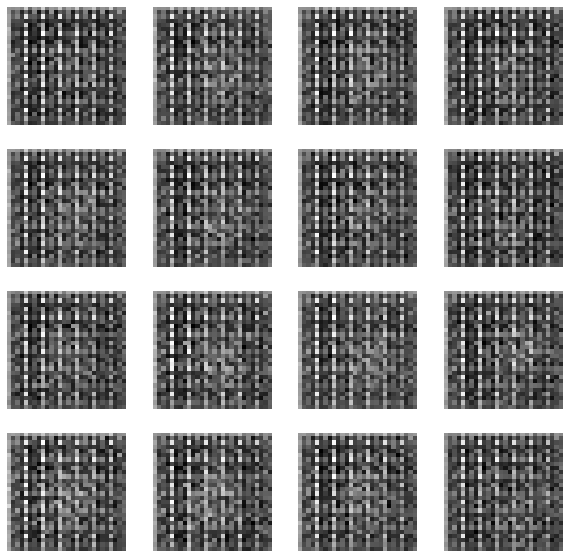

Epoch  2


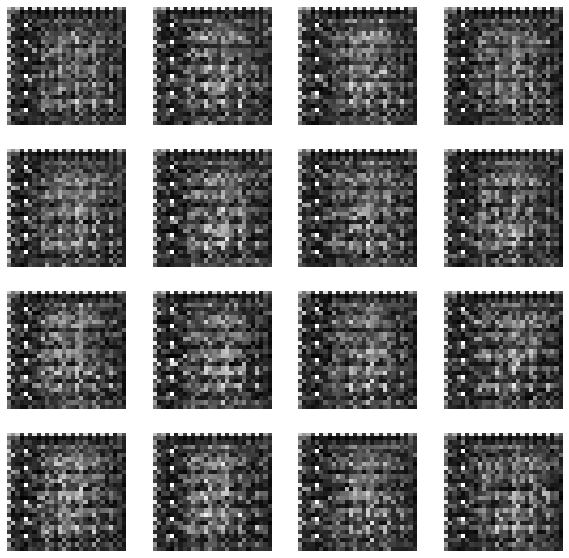

Epoch  3


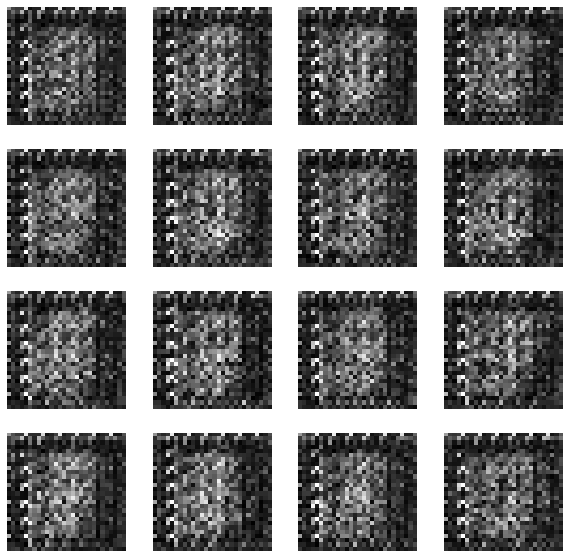

Epoch  4


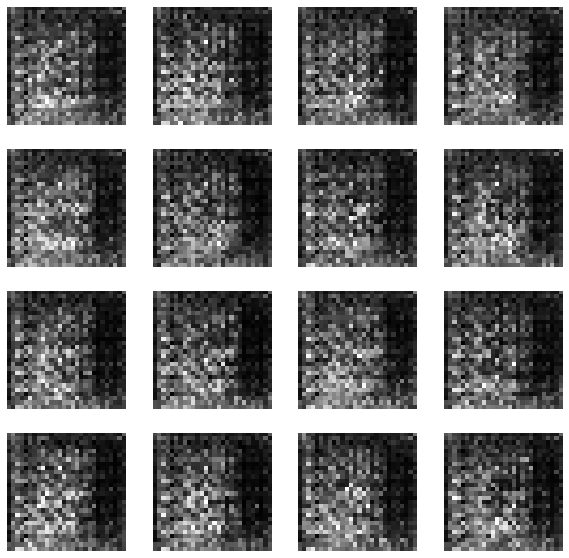

Epoch  5


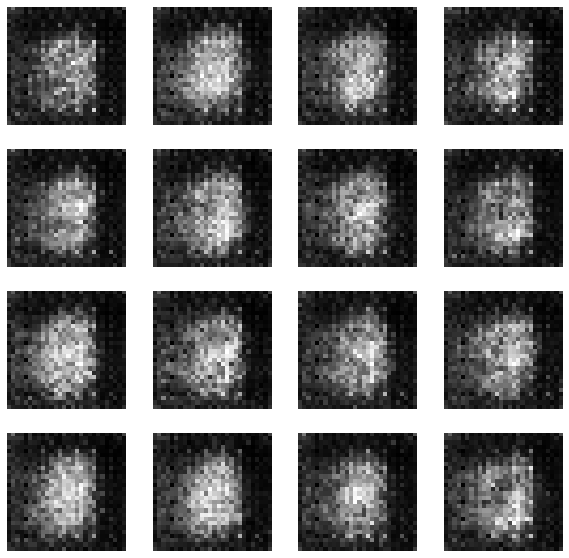

Epoch  6


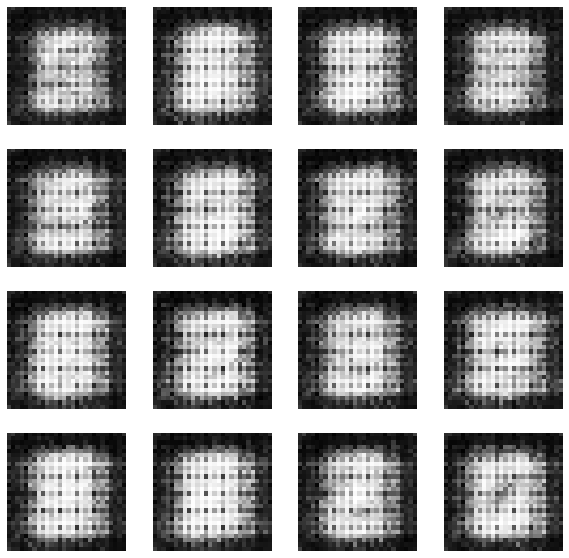

Epoch  7


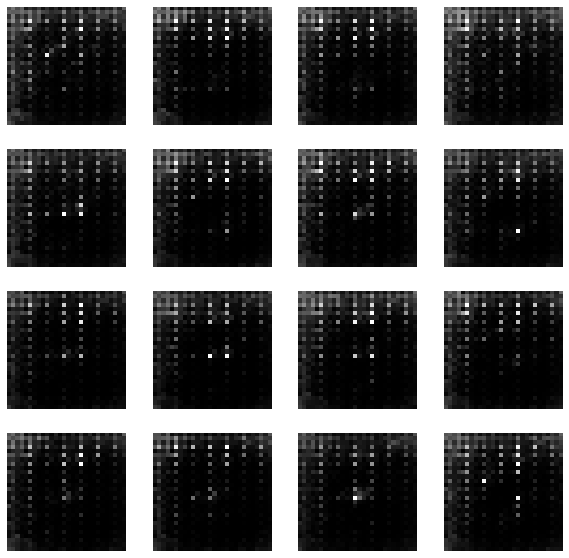

Epoch  8


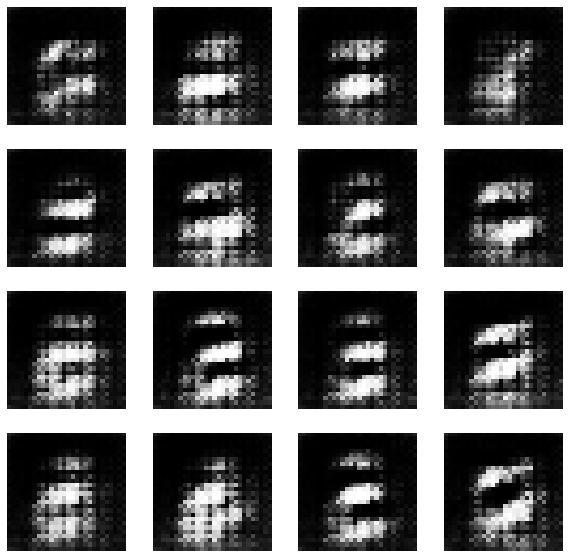

Epoch  9


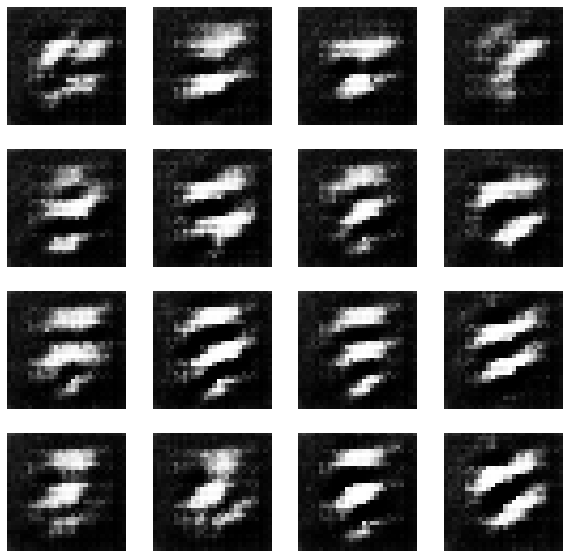

Epoch  10


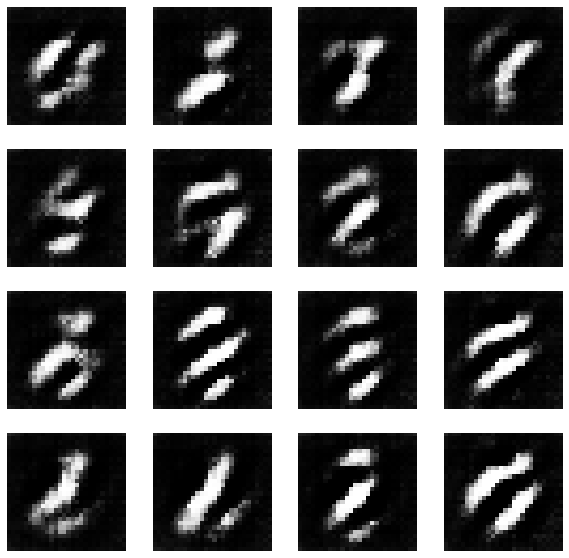

Epoch  11


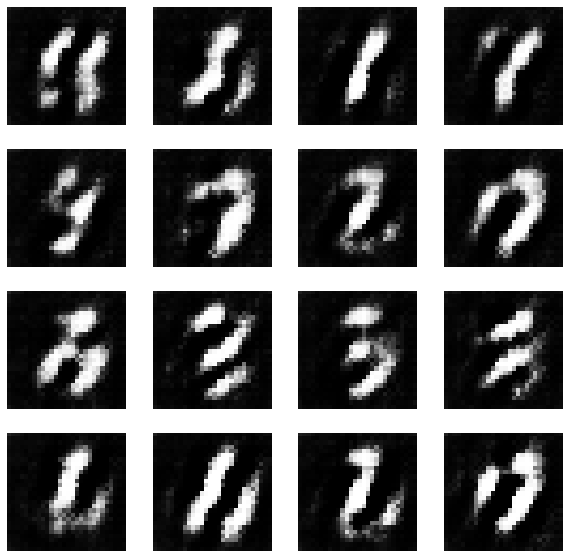

Epoch  12


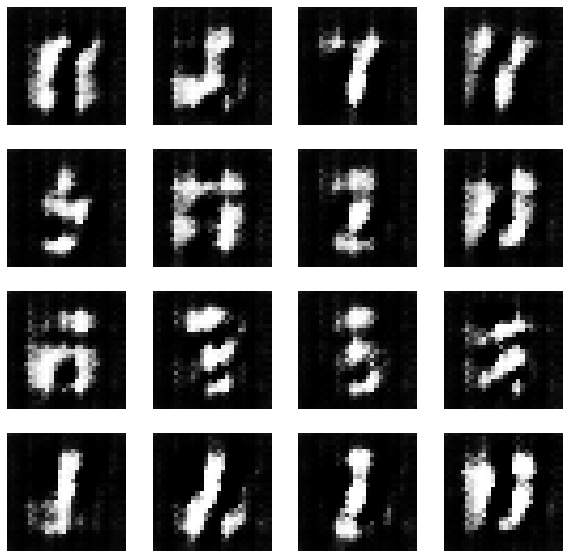

Epoch  13


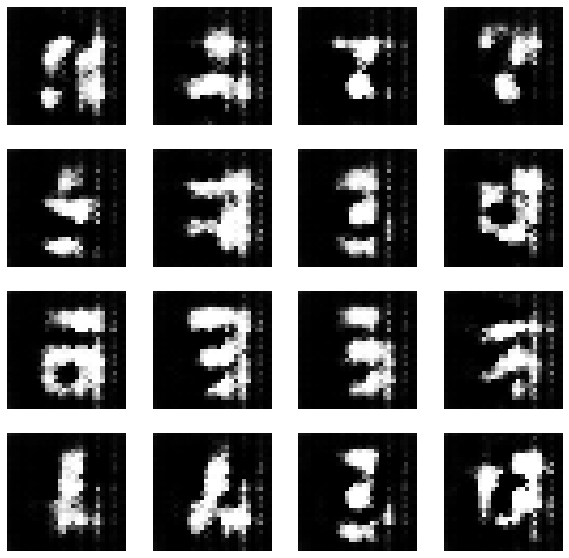

Epoch  14


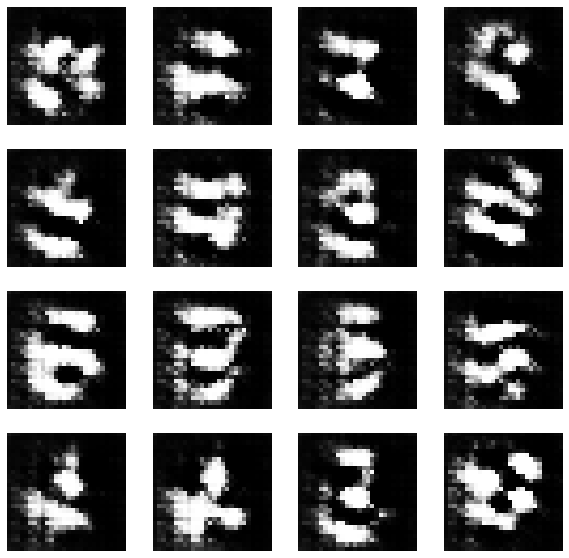

Epoch  15


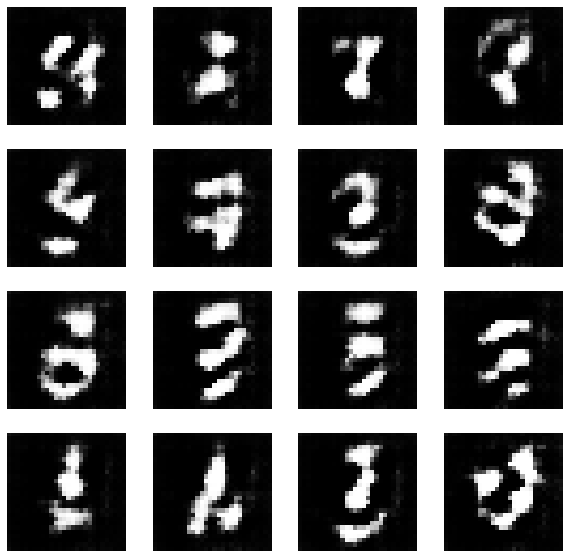

Epoch  16


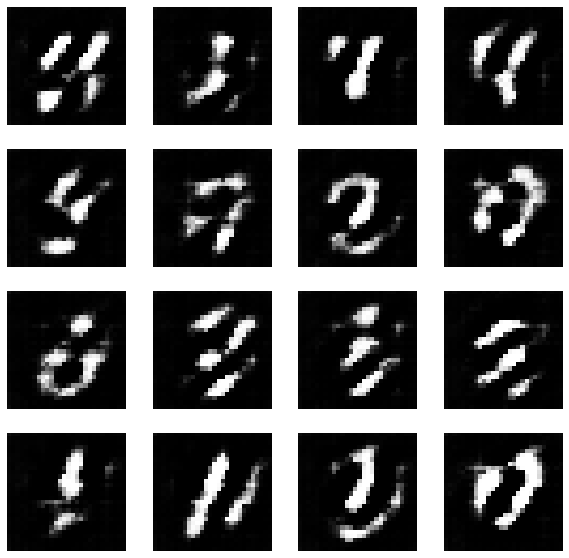

Epoch  17


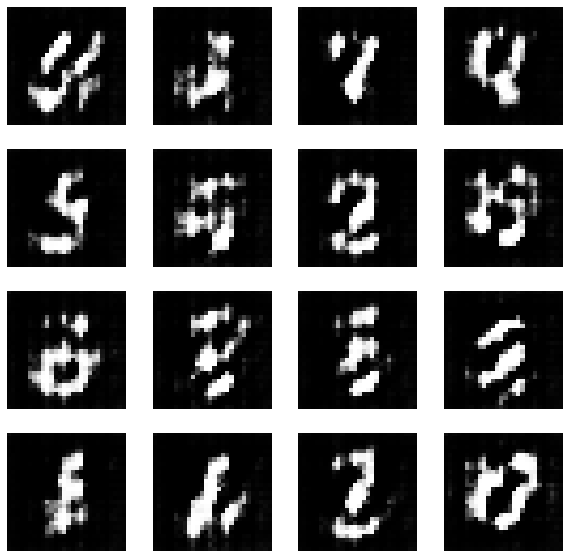

Epoch  18


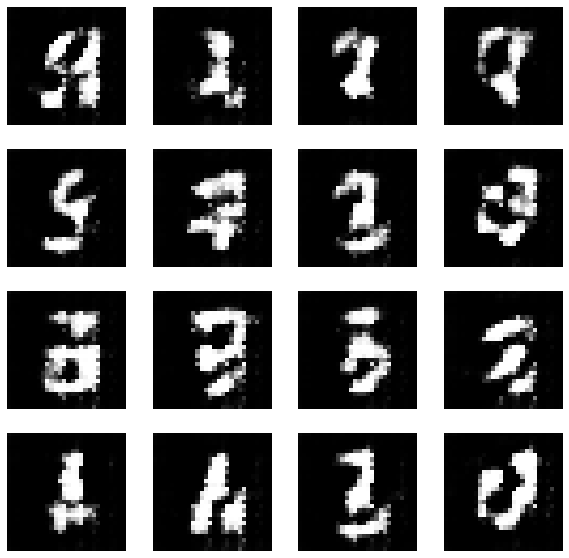

Epoch  19


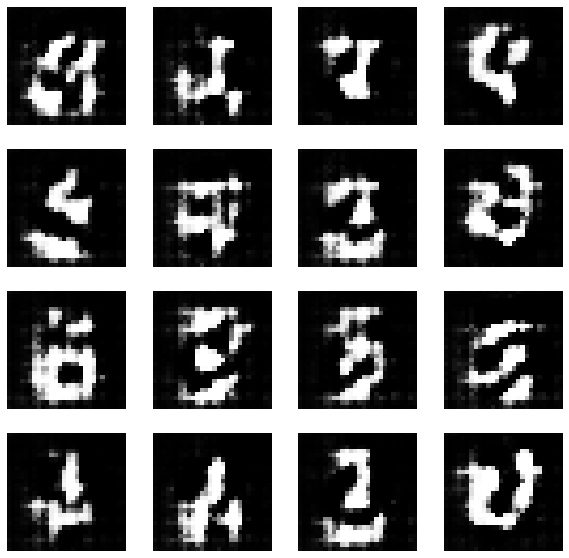

Epoch  20


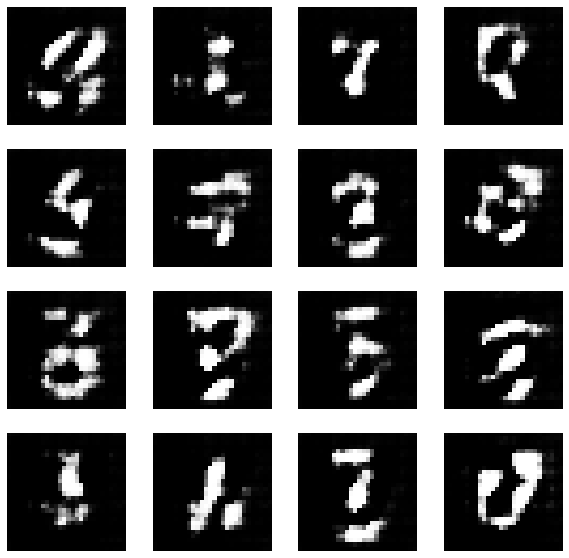

Epoch  21


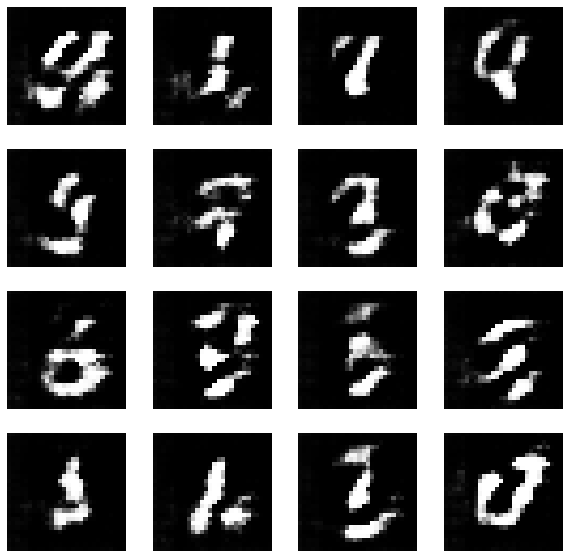

Epoch  22


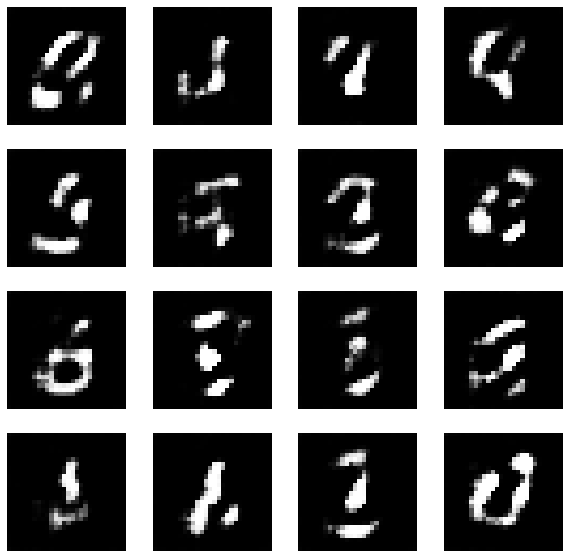

Epoch  23


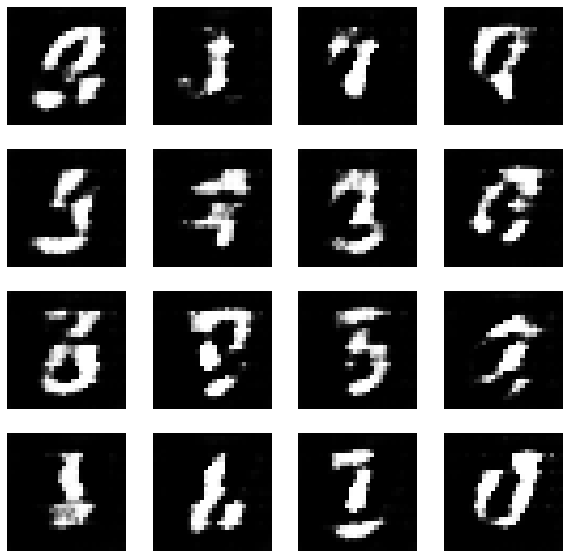

Epoch  24


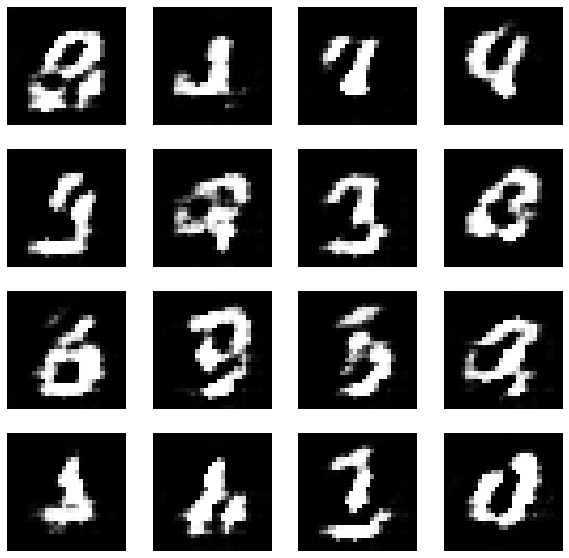

Epoch  25


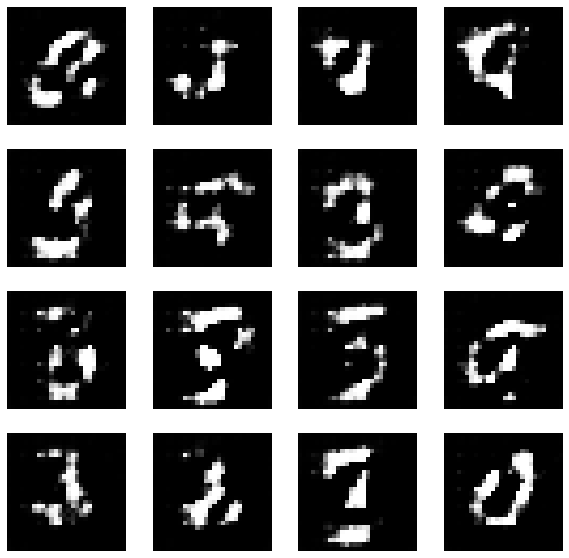

Epoch  26


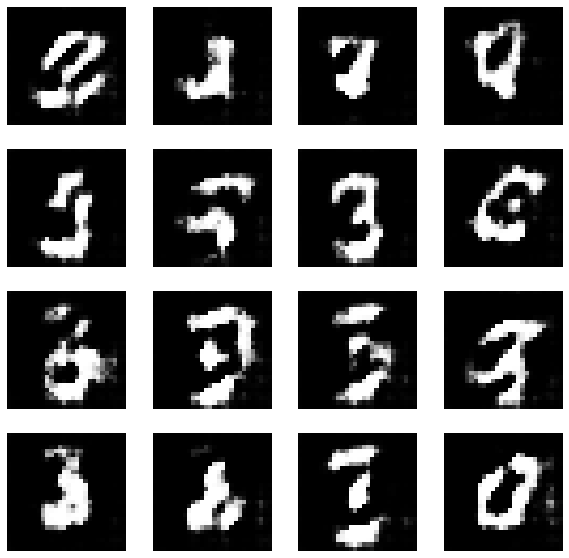

Epoch  27


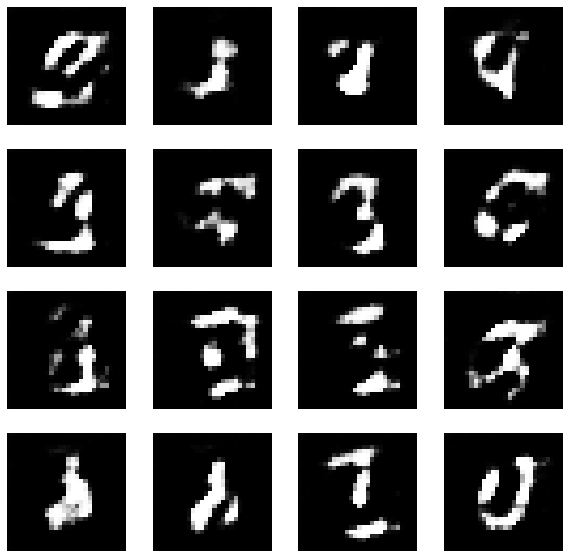

Epoch  28


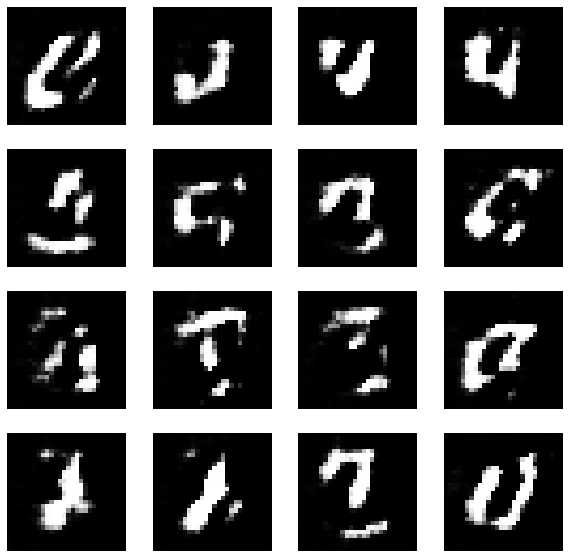

Epoch  29


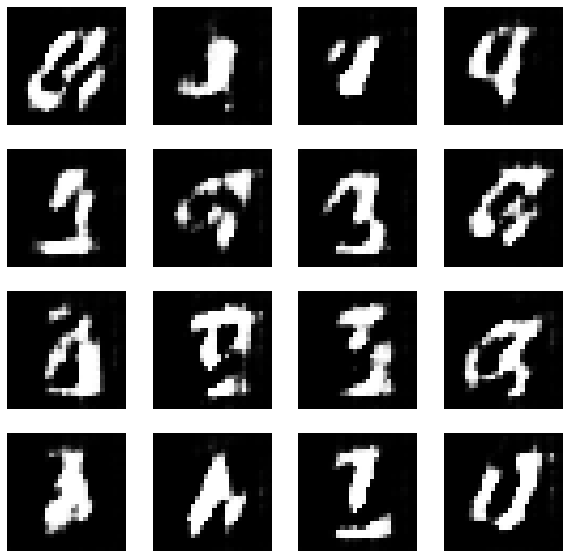

Epoch  30


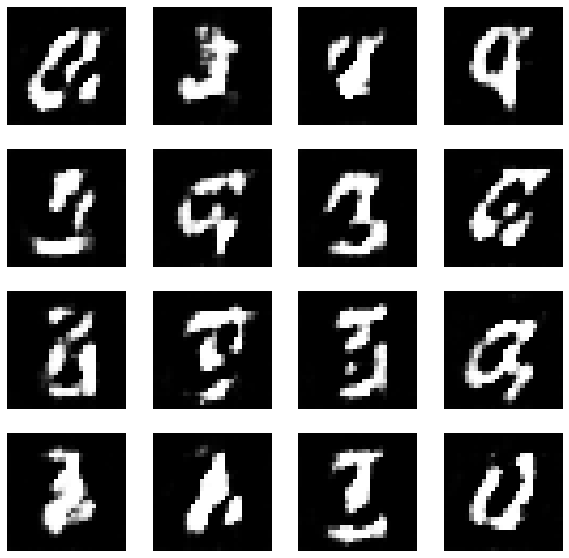

Epoch  31


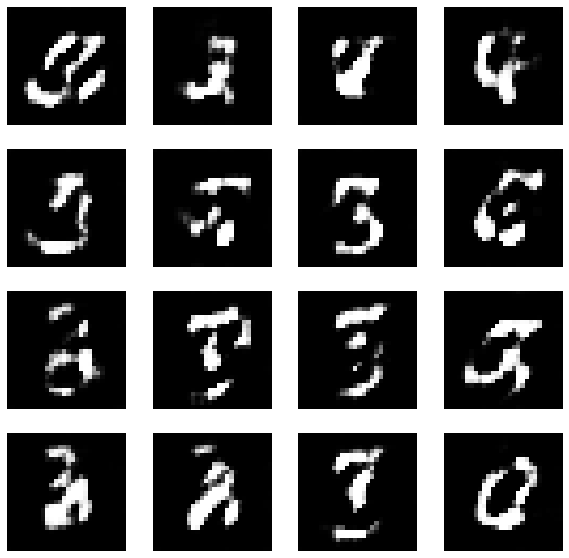

Epoch  32


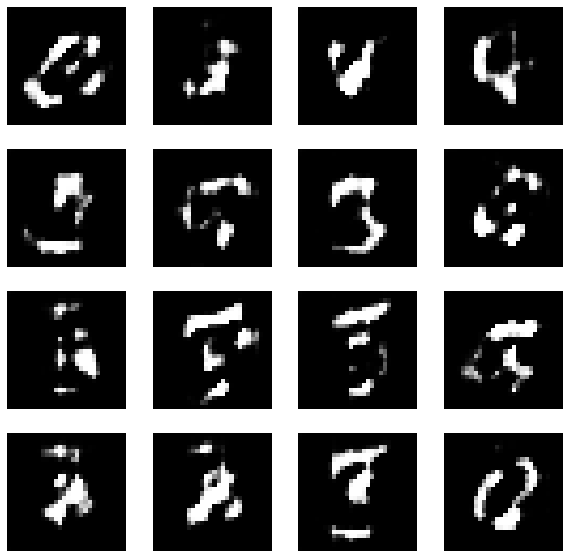

Epoch  33


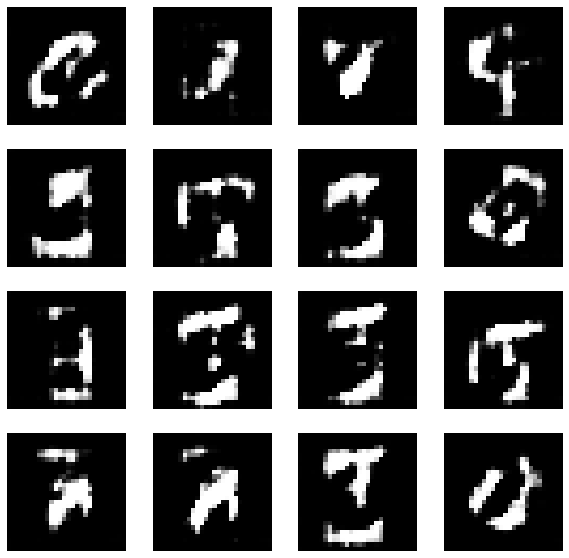

Epoch  34


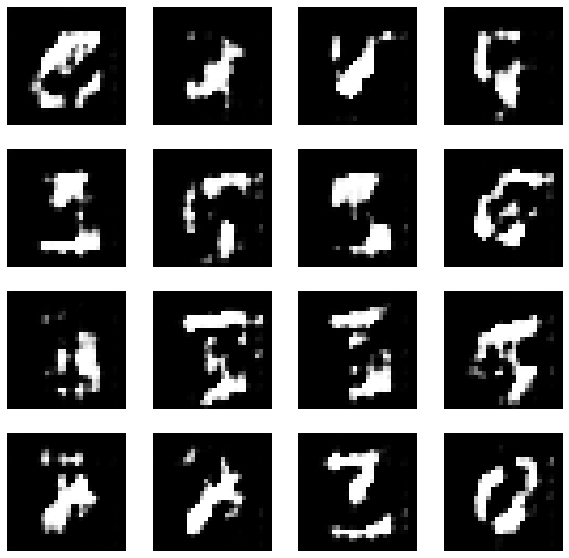

Epoch  35


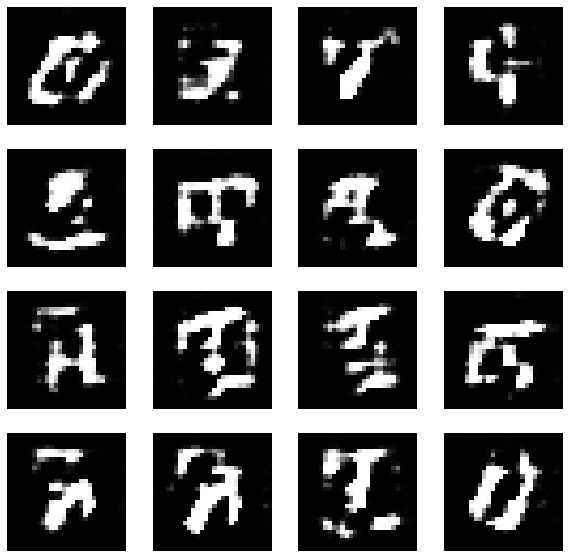

Epoch  36


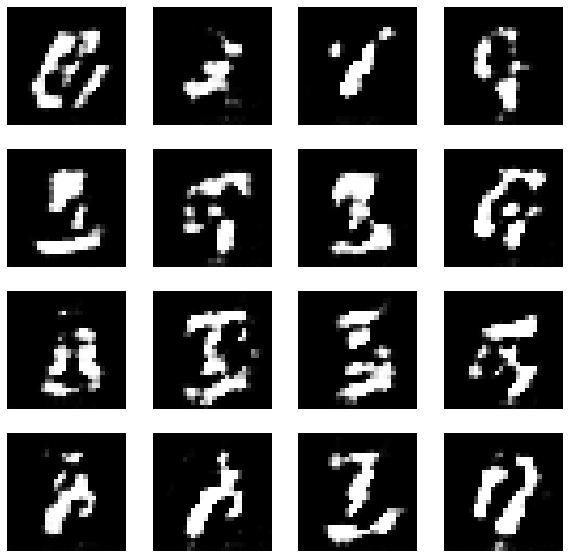

Epoch  37


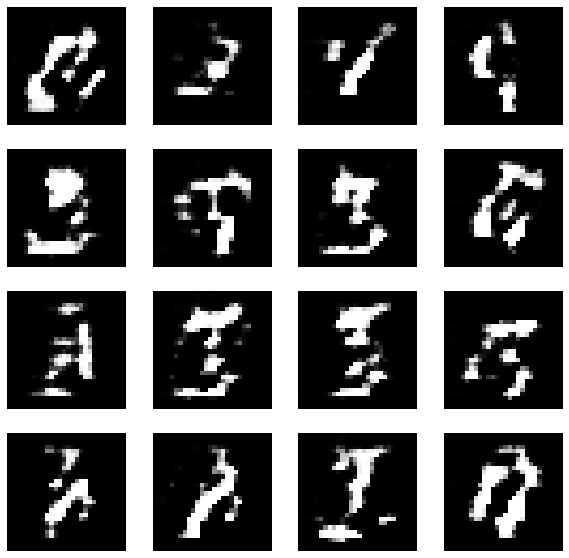

Epoch  38


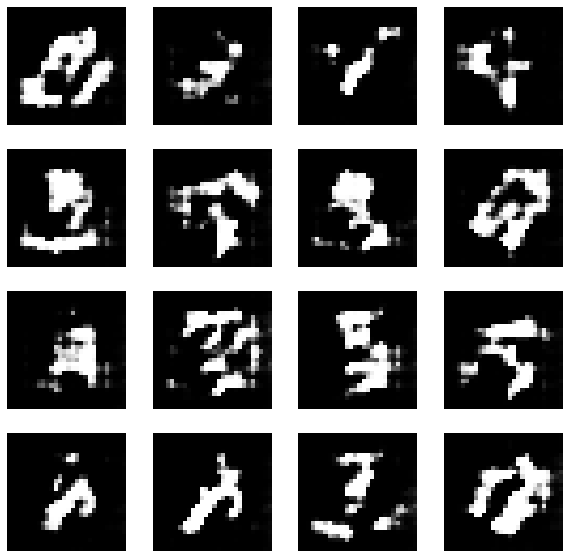

Epoch  39


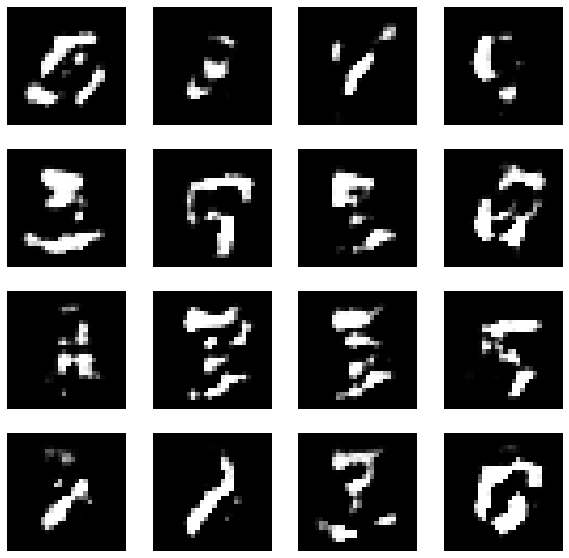

Epoch  40


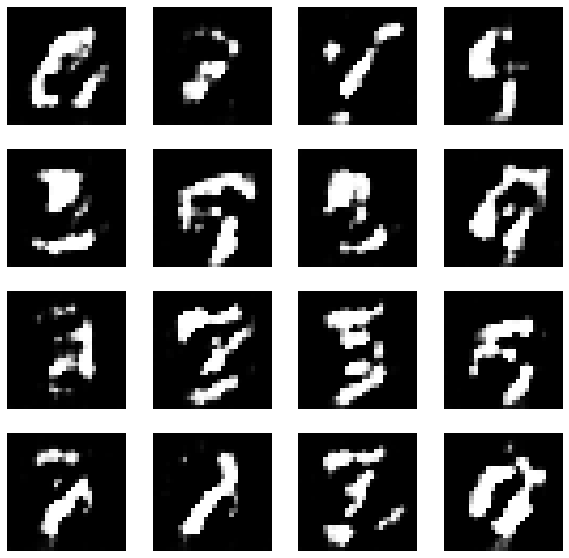

Epoch  41


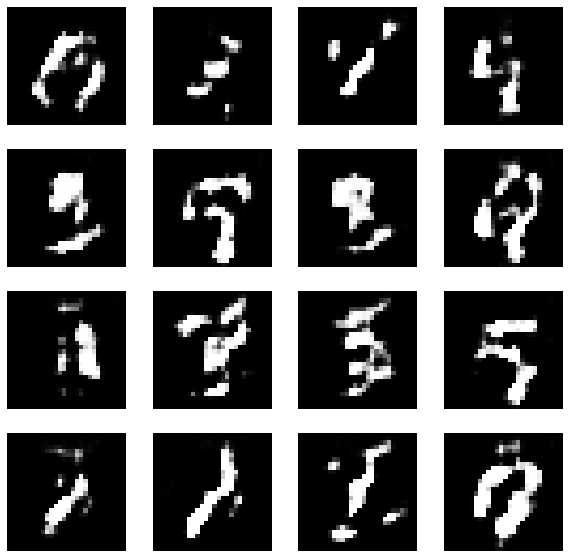

Epoch  42


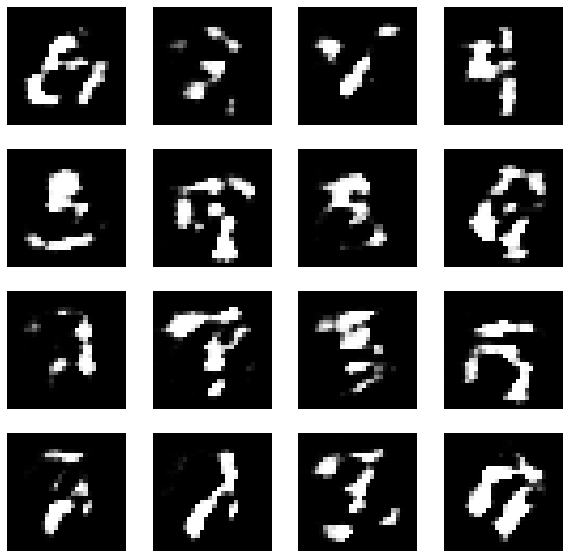

Epoch  43


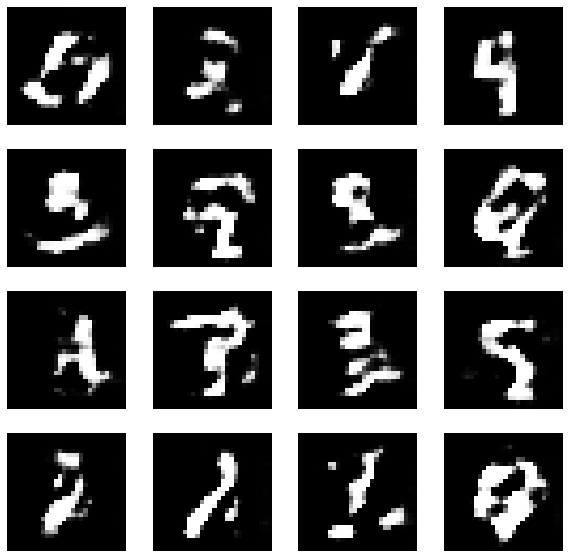

Epoch  44


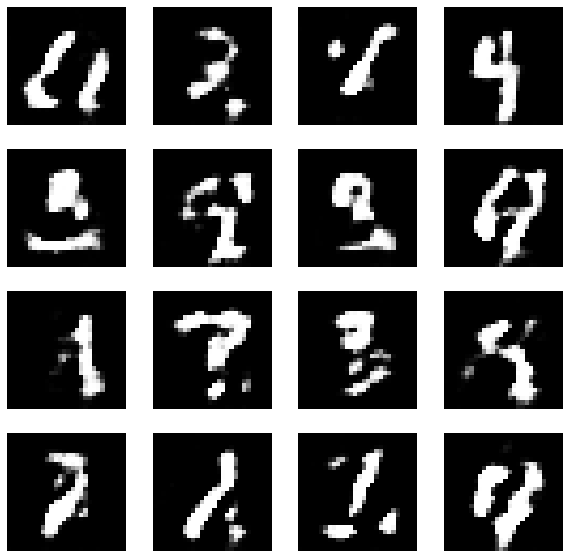

Epoch  45


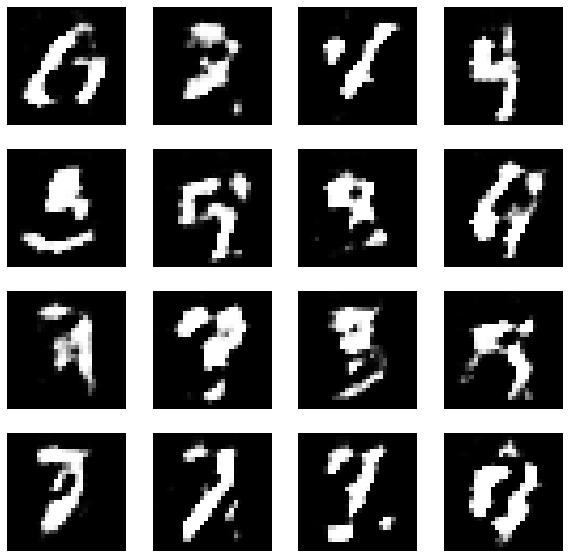

Epoch  46


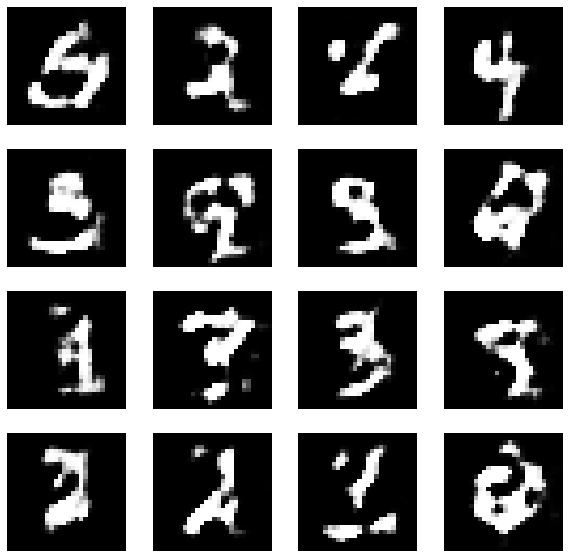

Epoch  47


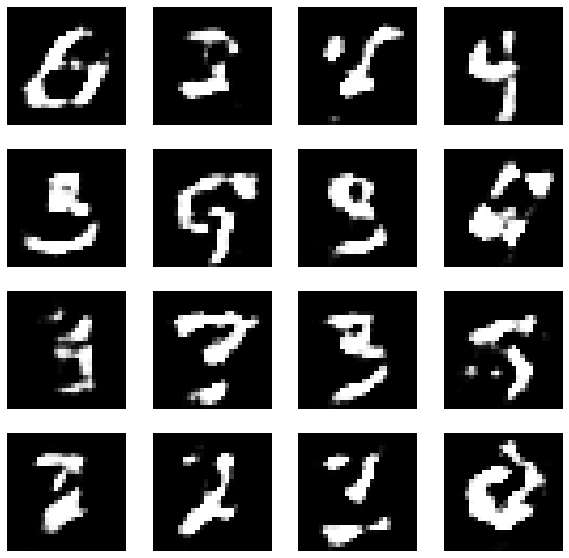

Epoch  48


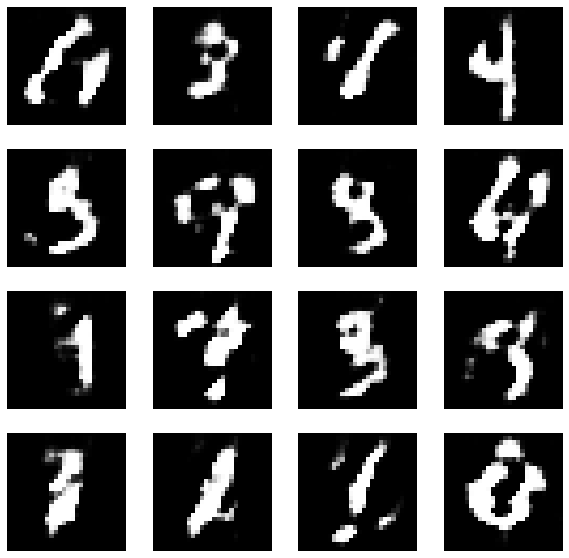

Epoch  49


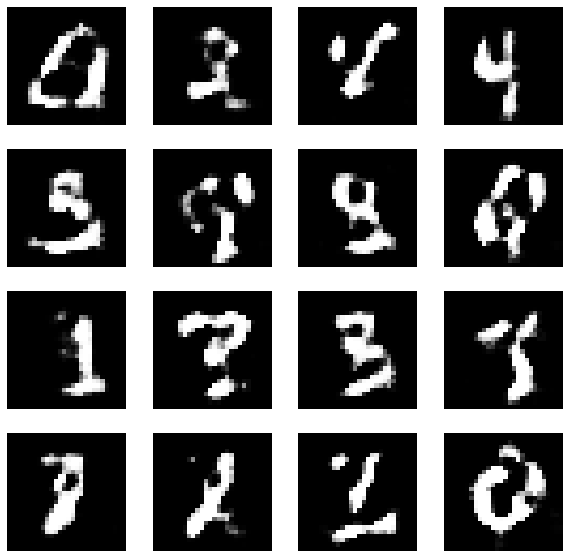

Epoch  50


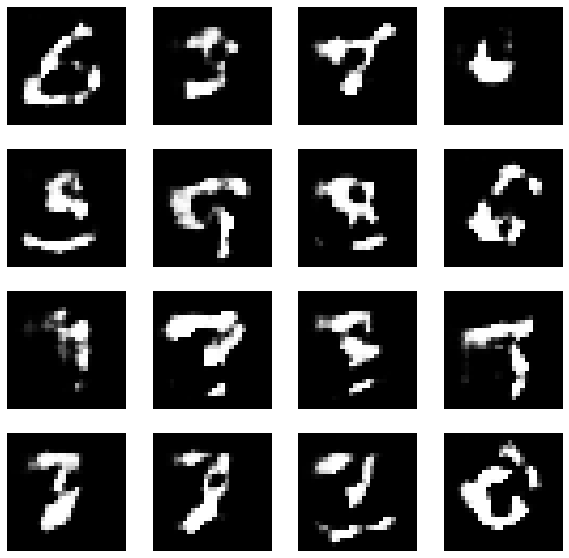

Epoch  51


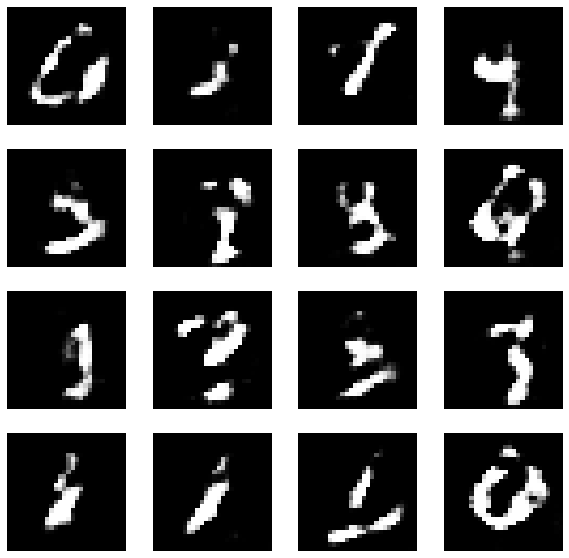

Epoch  52


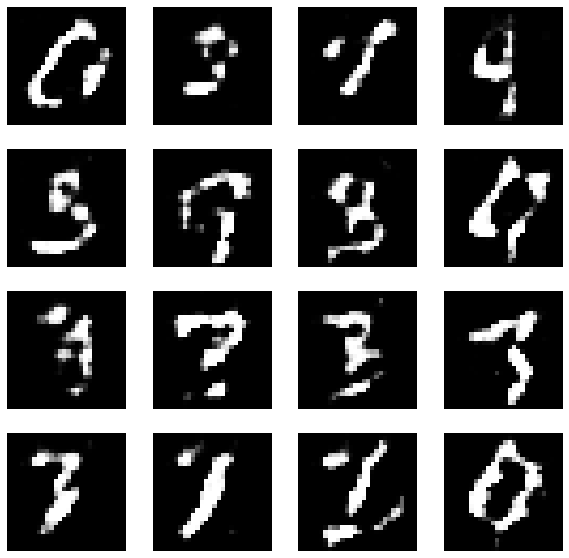

Epoch  53


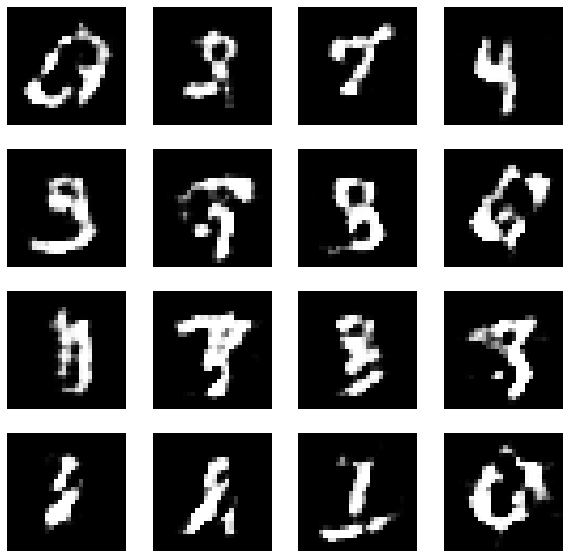

Epoch  54


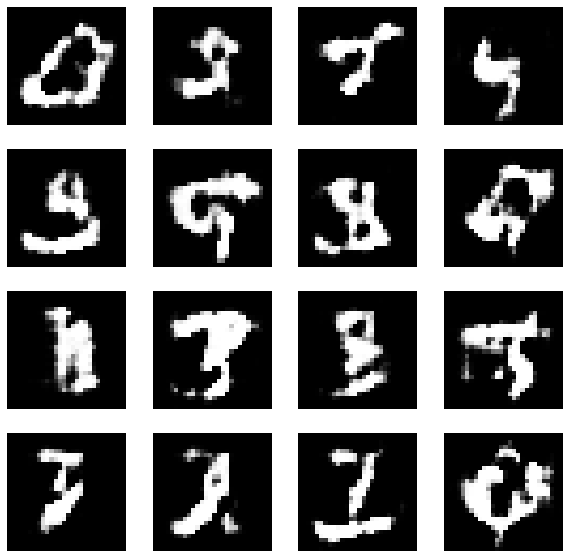

Epoch  55


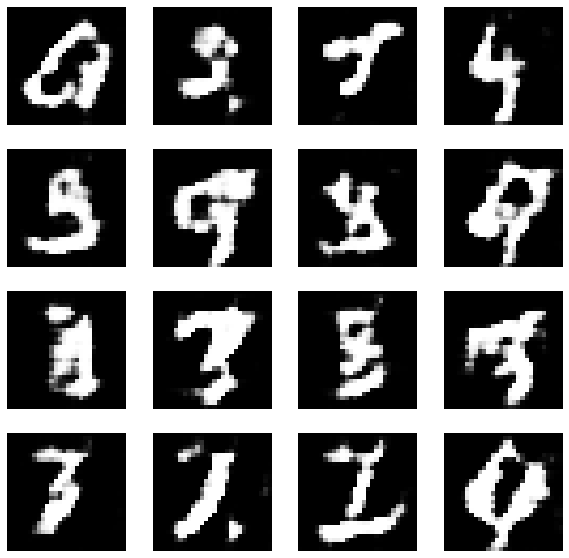

Epoch  56


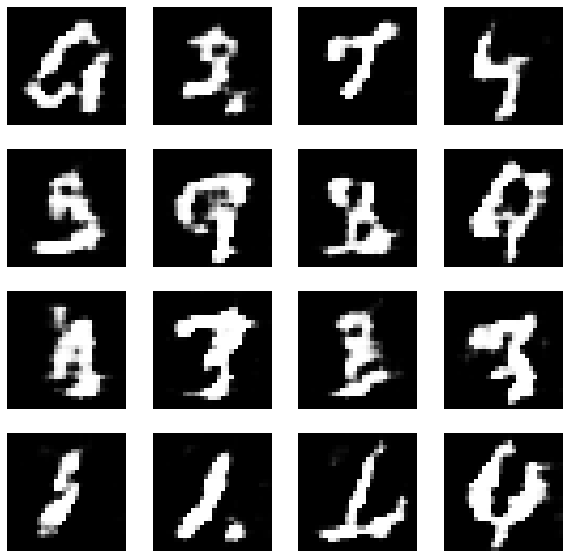

Epoch  57


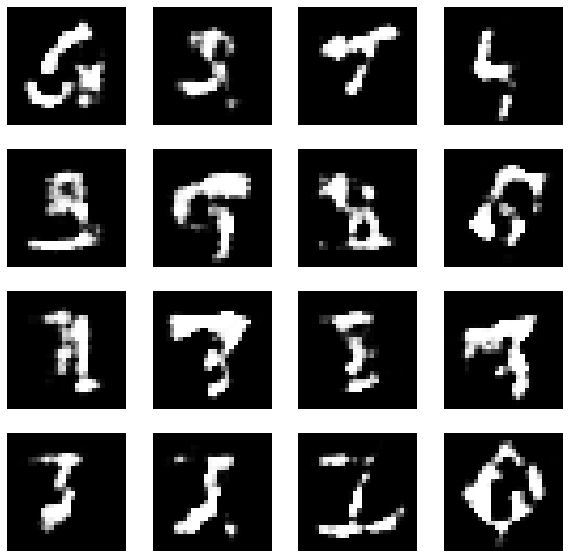

Epoch  58


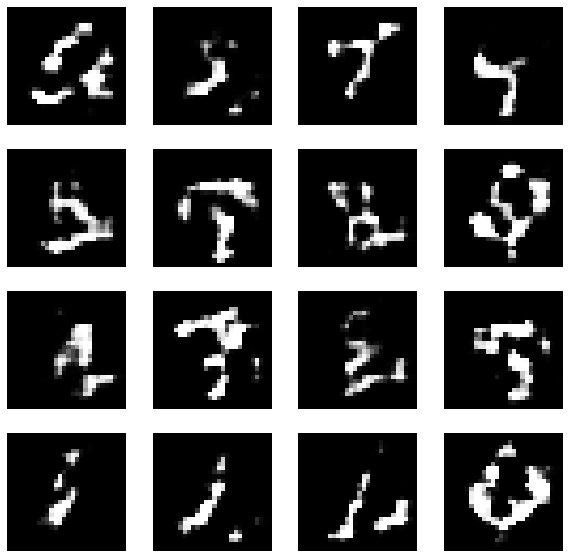

Epoch  59


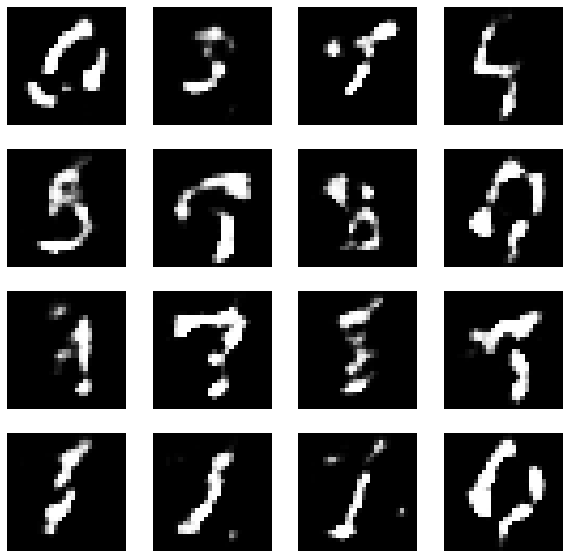

Epoch  60


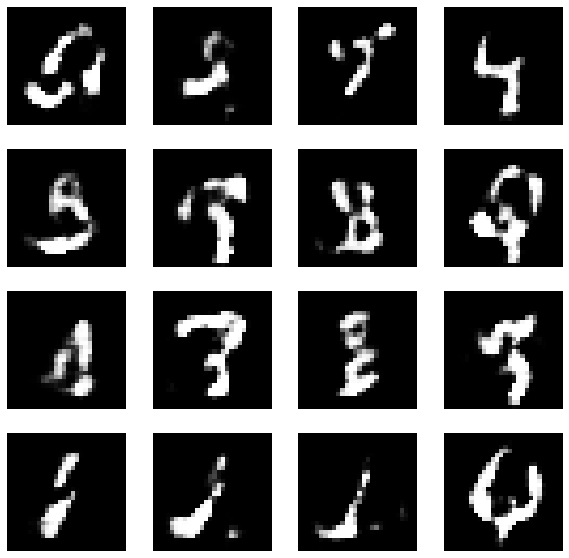

Epoch  61


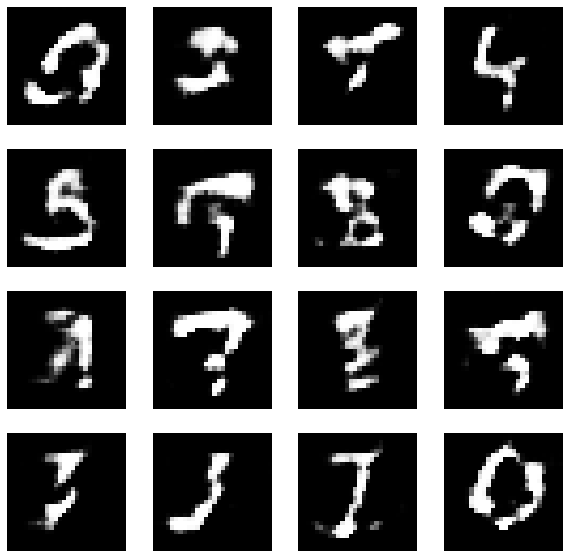

Epoch  62


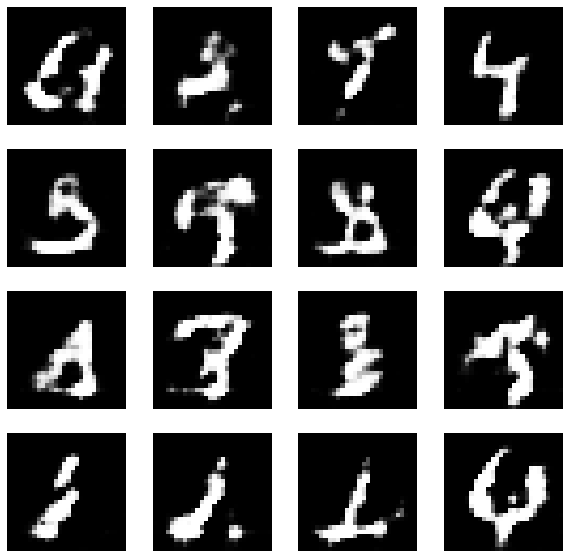

Epoch  63


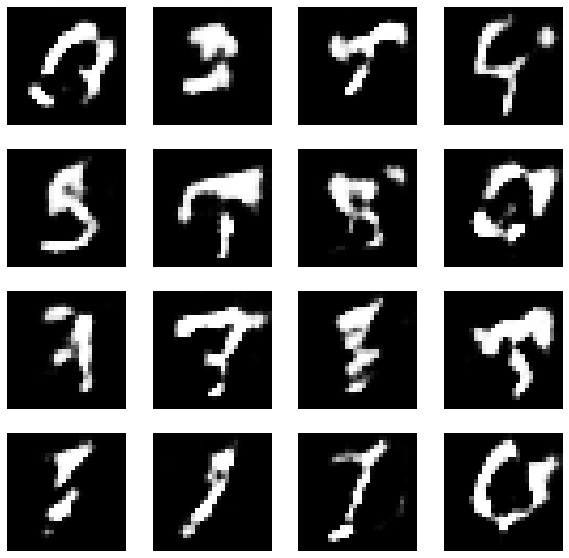

Epoch  64


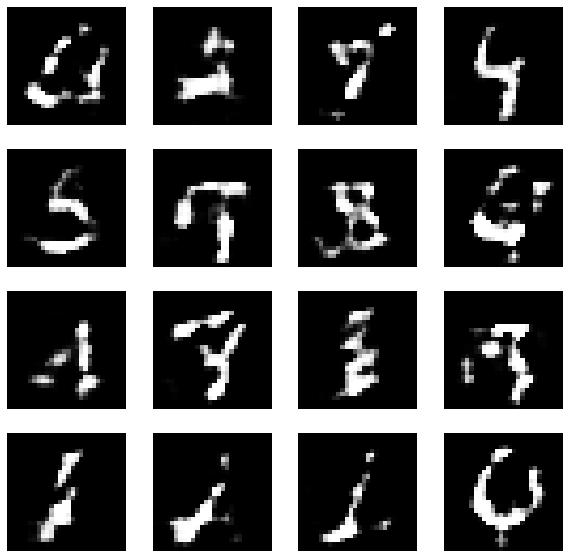

Epoch  65


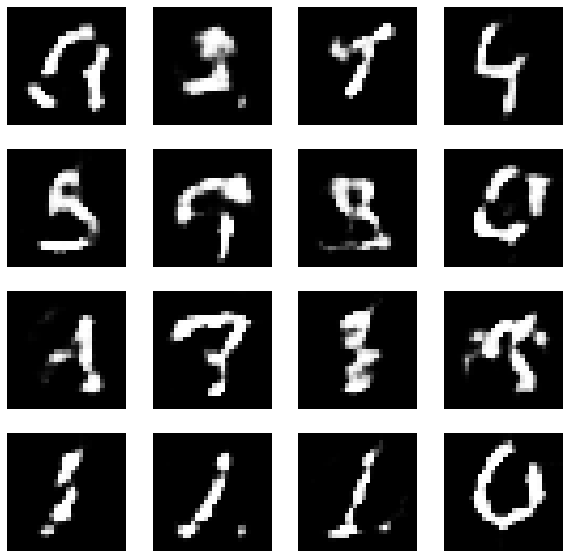

Epoch  66


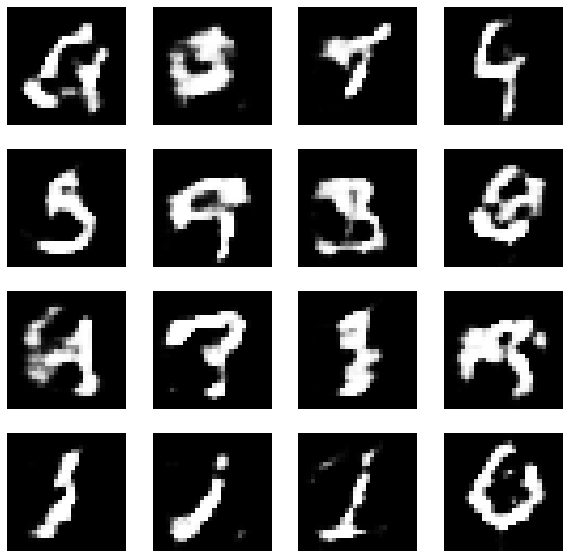

Epoch  67


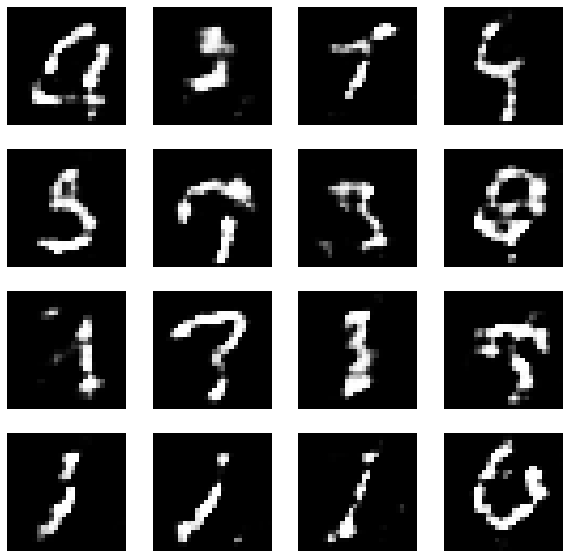

Epoch  68


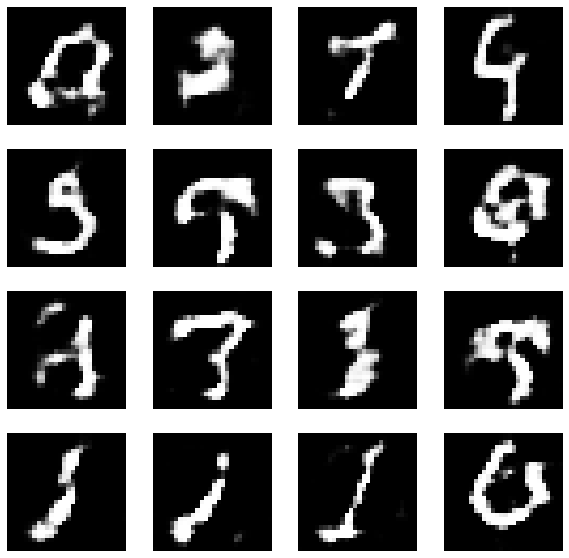

Epoch  69


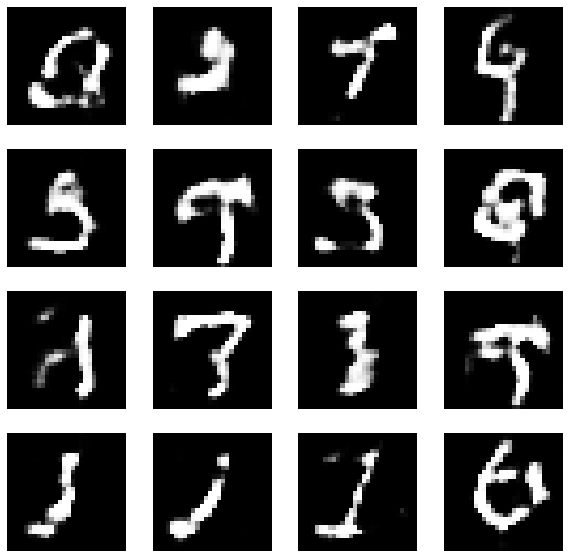

Epoch  70


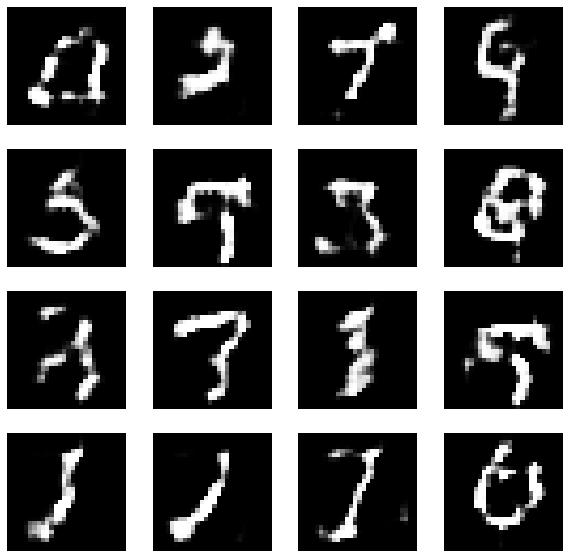

Epoch  71


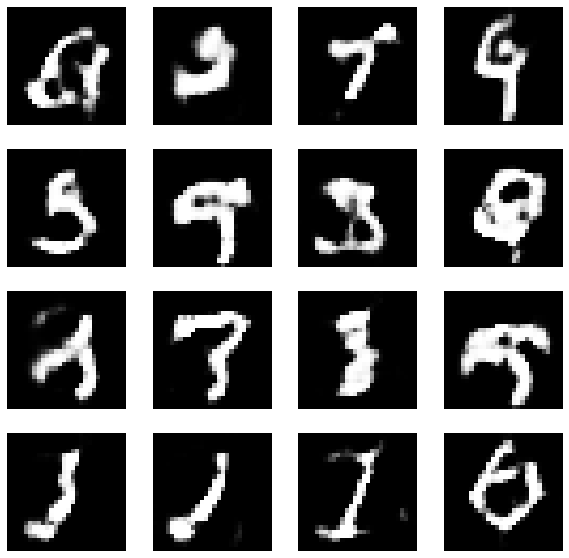

Epoch  72


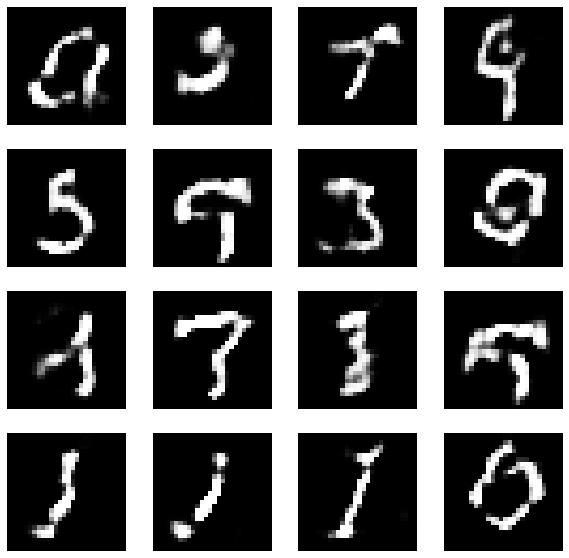

Epoch  73


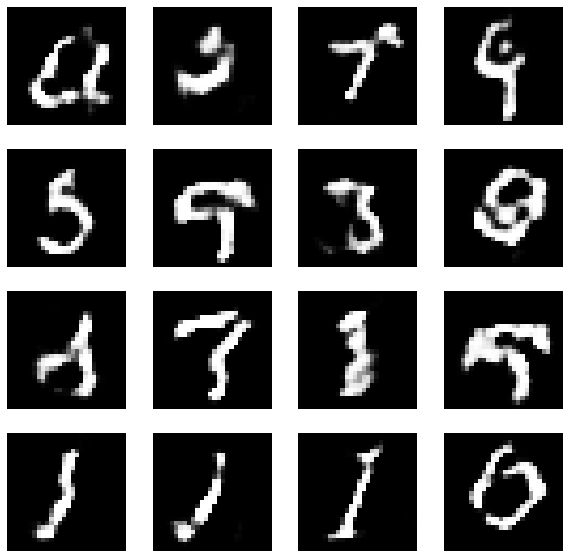

Epoch  74


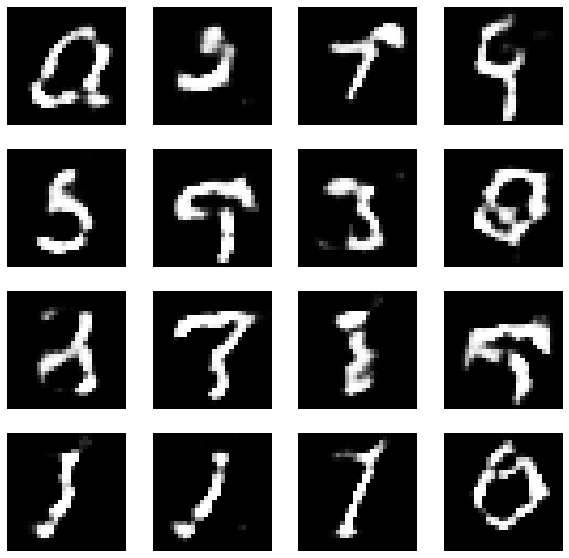

Epoch  75


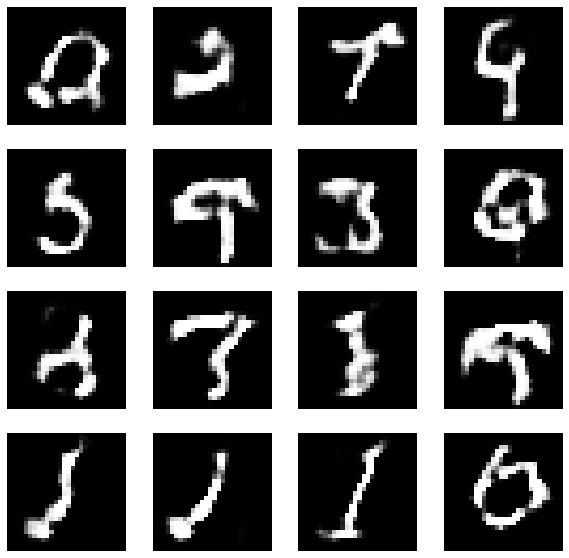

Epoch  76


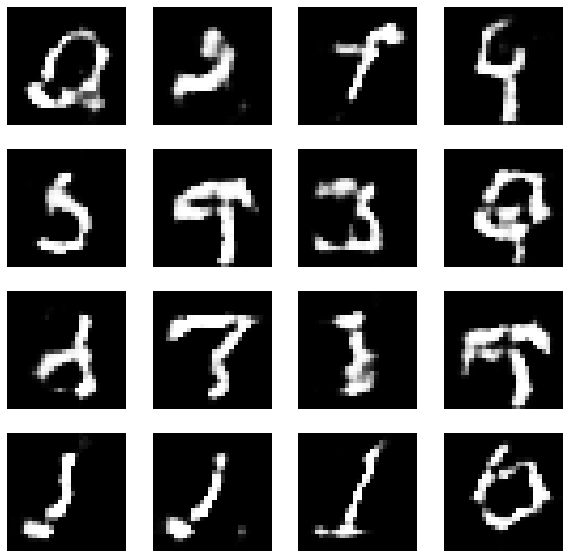

Epoch  77


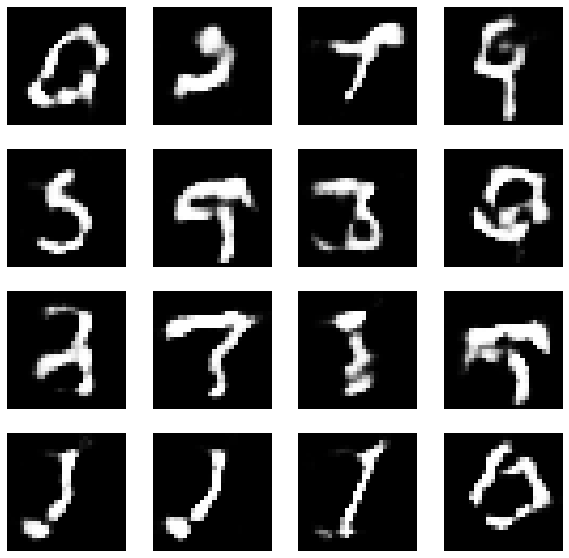

Epoch  78


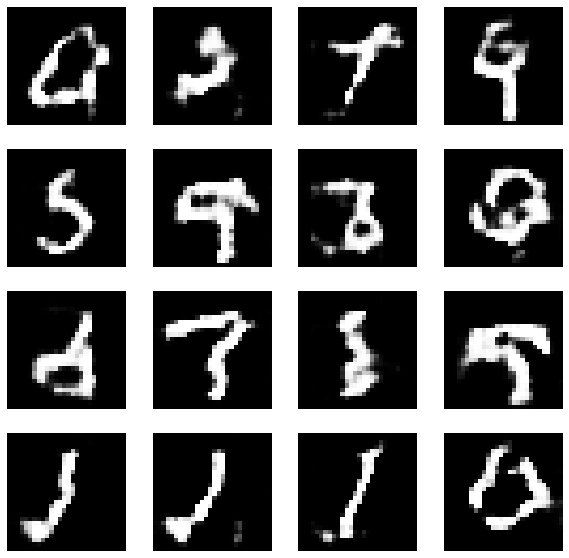

Epoch  79


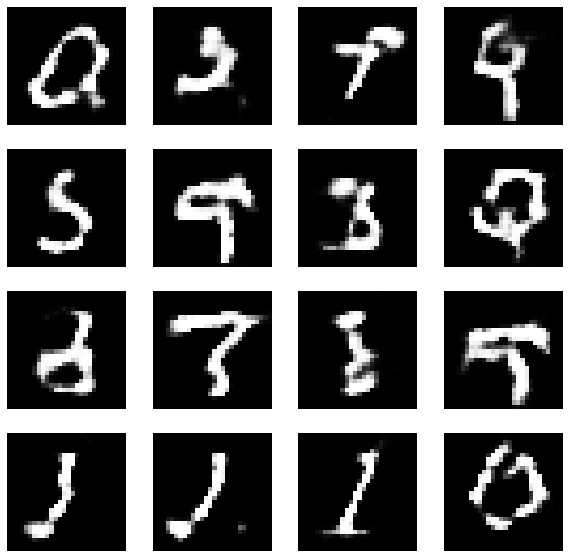

Epoch  80


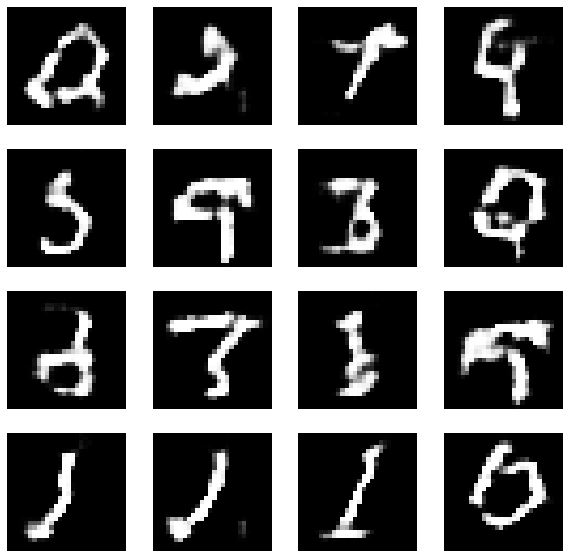

Epoch  81


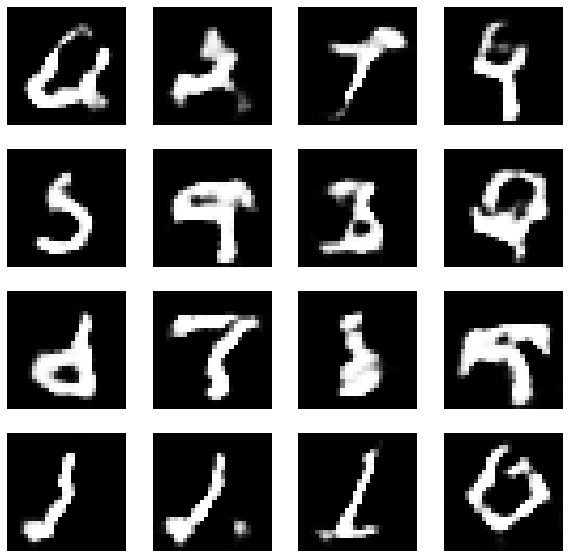

Epoch  82


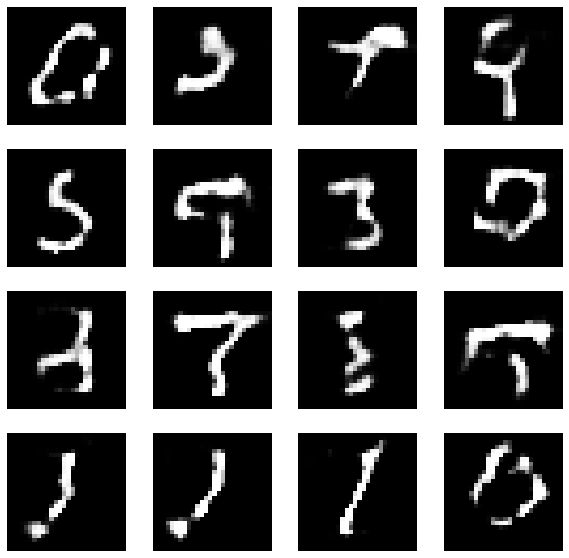

Epoch  83


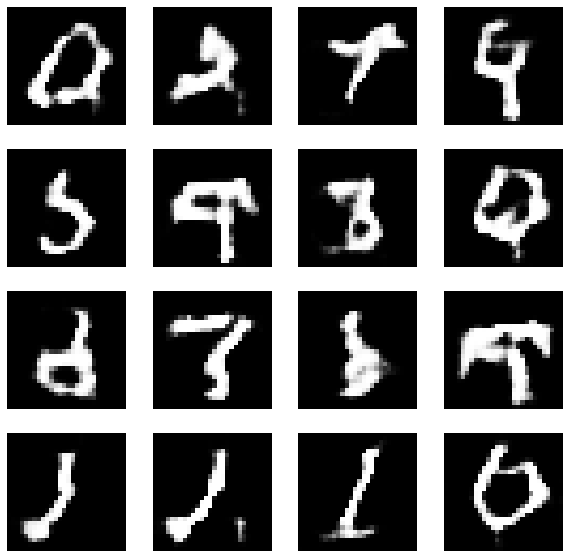

Epoch  84


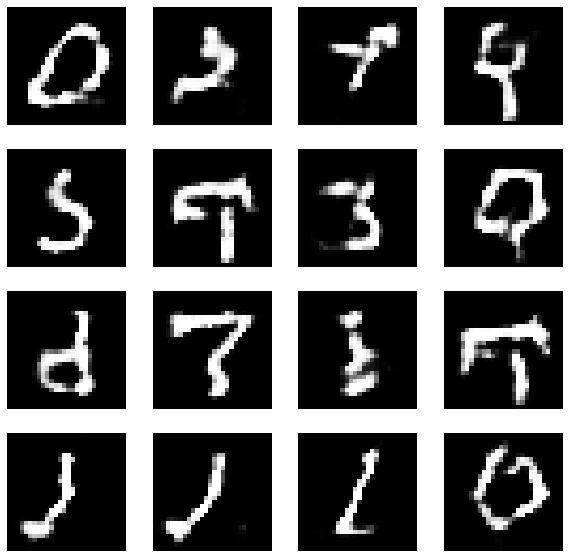

Epoch  85


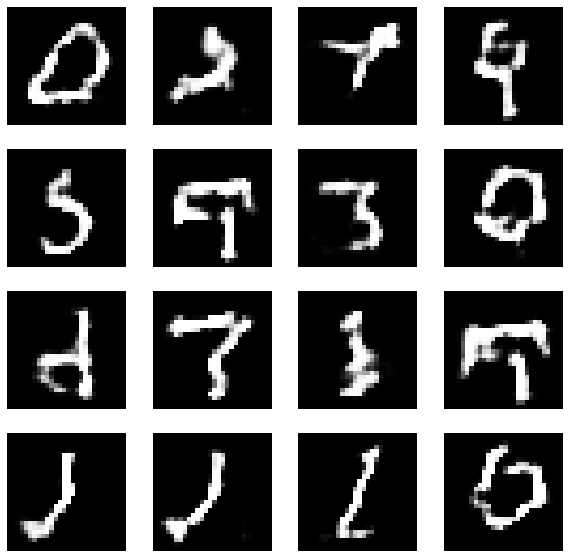

Epoch  86


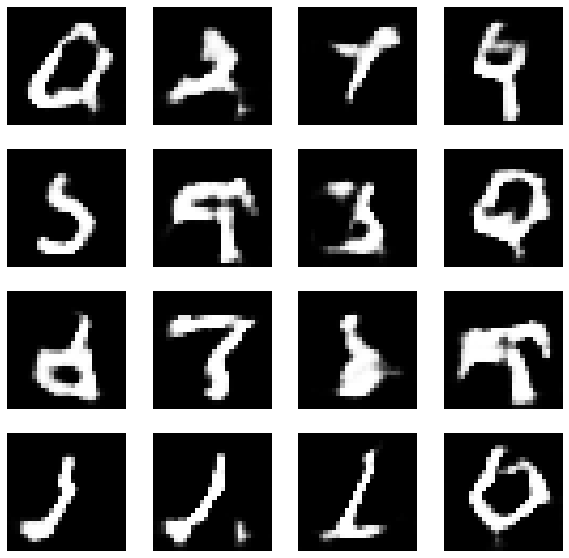

Epoch  87


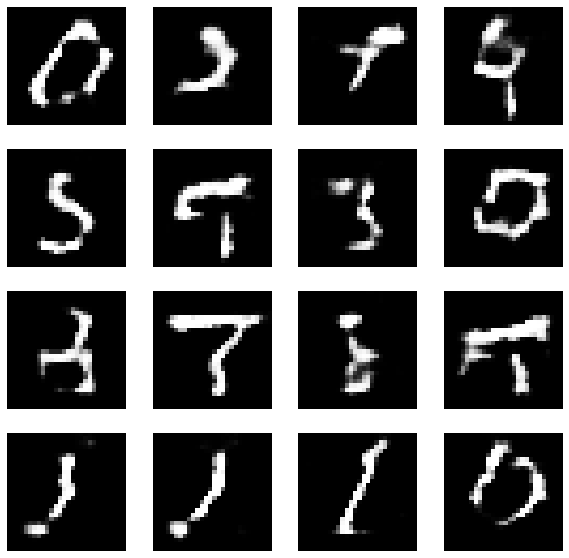

Epoch  88


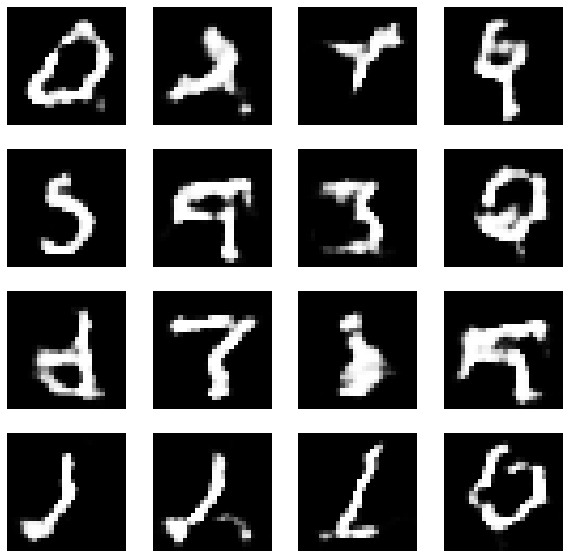

Epoch  89


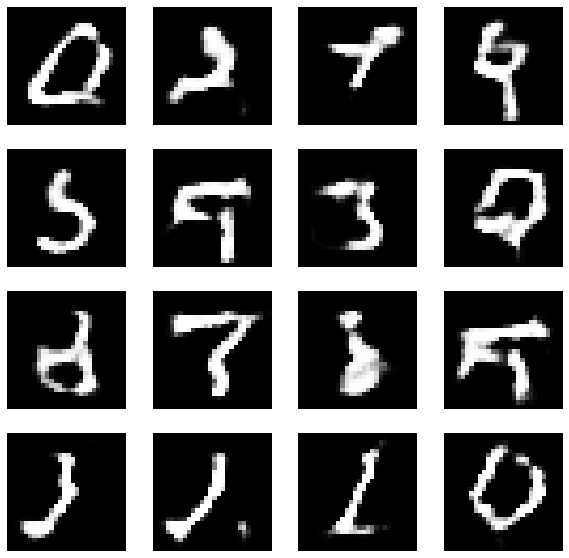

Epoch  90


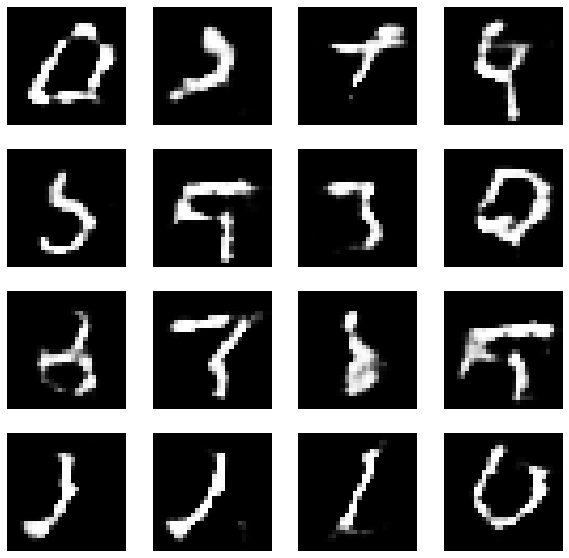

Epoch  91


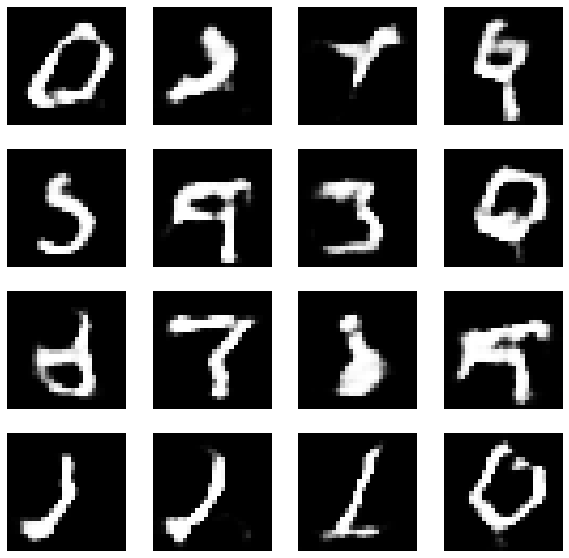

Epoch  92


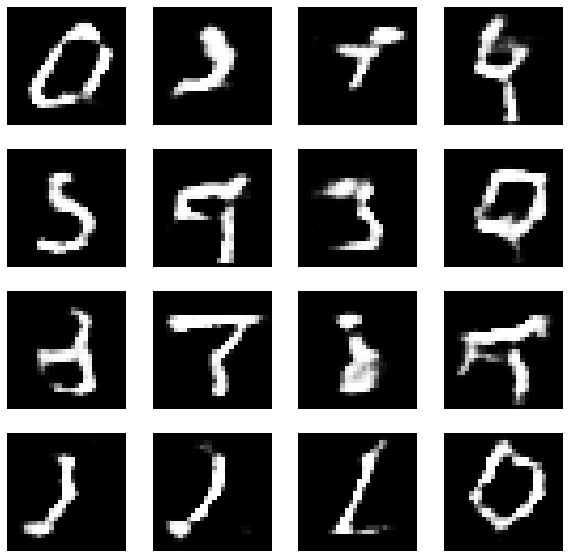

Epoch  93


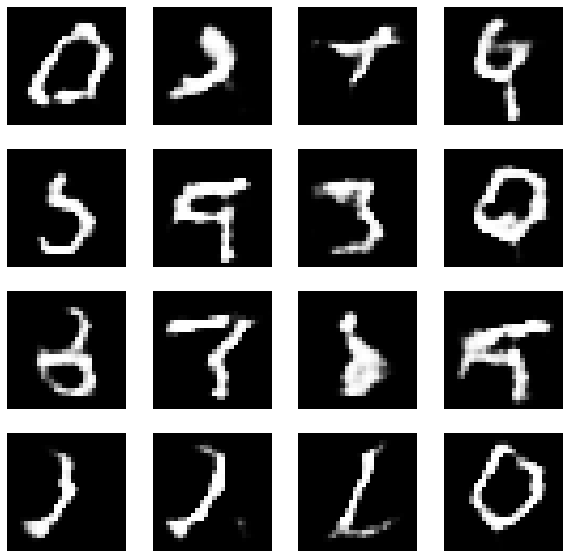

Epoch  94


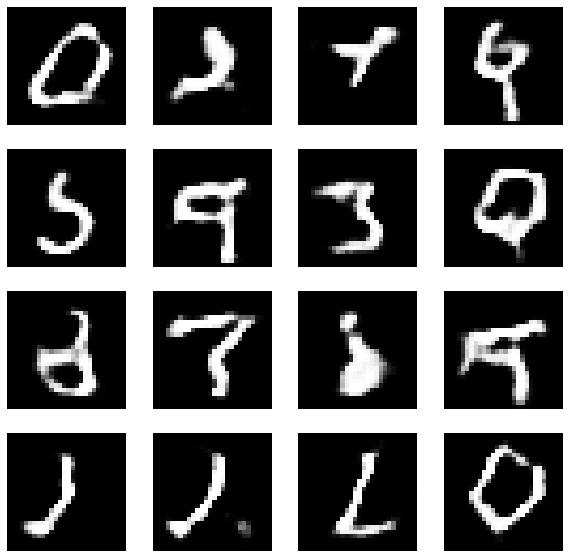

Epoch  95


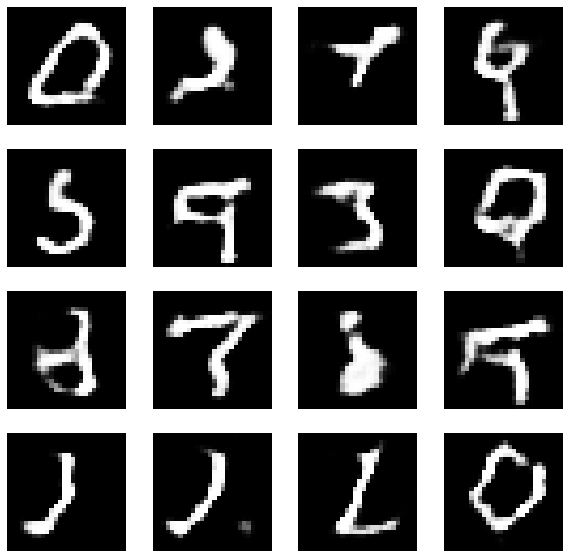

Epoch  96


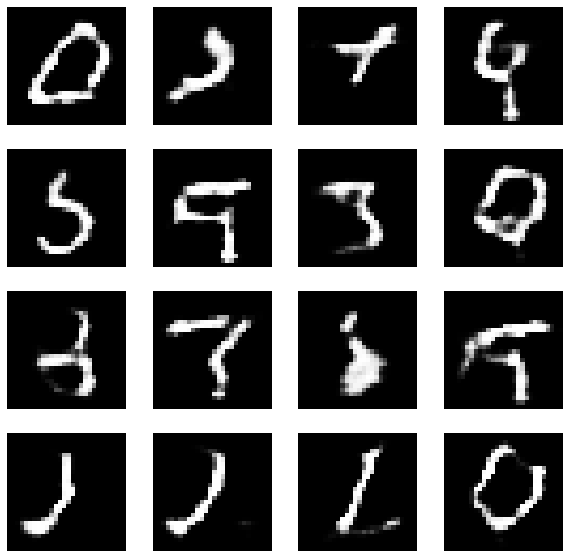

Epoch  97


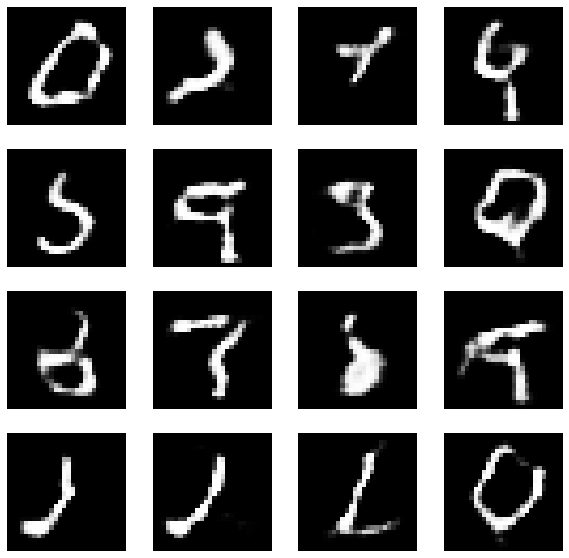

Epoch  98


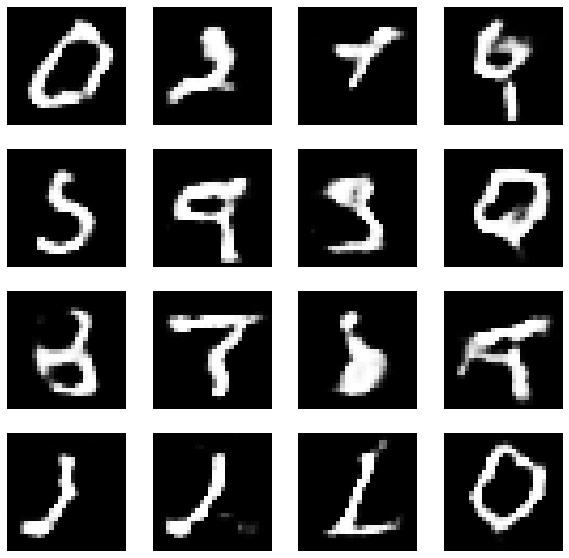

Epoch  99


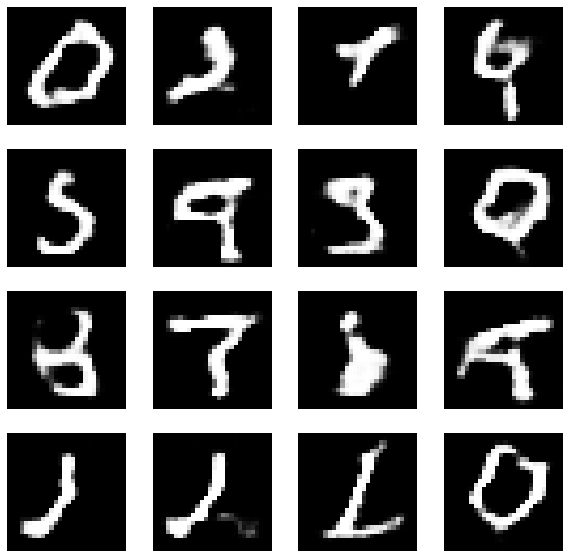

Epoch  100


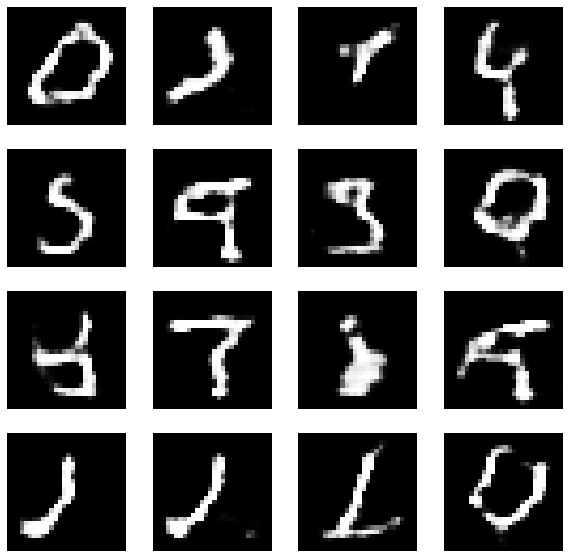

In [ ]:
train(X_train,epochs,test_images)